In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)
print(new_data["gene"].unique())
new_data.gene[new_data.gene == 'ALL'] = 0
new_data.gene[new_data.gene == 'AML'] = 1
print('Updated value of gene : '+str(new_data["gene"].unique()))

(74, 5148)
['discrete' 'class' 'ALL' 'AML']
Updated value of gene : ['discrete' 'class' 0 1]


In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles

print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [4]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [5]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [6]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [7]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [8]:
temp_feature_set=StandardScaler().fit_transform(feature_set)

In [9]:
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

# Selection of features using F Classification 

In [11]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :145.0729284286499 seconds


In [12]:
selected_features = list(selected_features)

In [13]:
required_features = selected_features[:500]
print('Length of required features : '+str(len(required_features)))

Length of required features : 500


In [14]:
print(required_features)

['U46571_at', 'M82882_at', 'HG2917-HT3061_f_at', 'Z23115_at', 'U77827_at', 'Z48051_rna1_at', 'L13800_at', 'X06745_at', 'U56833_at', 'S38953_s_at', 'U72066_at', 'L00634_s_at', 'L00058_at', 'X67951_at', 'S79873_s_at', 'U41060_at', 'U52077_s_at', 'X74328_rna1_at', 'Z81326_at', 'Z49194_at', 'X17644_s_at', 'U66497_at', 'X78669_at', 'HG1728-HT1734_s_at', 'L09717_at', 'D25278_at', 'X93511_s_at', 'D88613_at', 'L05148_at', 'M58285_at', 'X63717_at', 'U75276_s_at', 'U77718_at', 'X17025_at', 'L43579_s_at', 'M34353_s_at', 'J05682_at', 'M55210_at', 'L08895_at', 'M26602_at', 'U52513_at', 'X80199_at', 'U18937_at', 'M31932_at', 'X90846_at', 'X16665_at', 'U44378_at', 'U21090_at', 'X66533_at', 'Z37976_at', 'X74614_at', 'M77349_at', 'U72936_s_at', 'M81181_s_at', 'U10117_at', 'X92098_at', 'L29376_at', 'X58528_s_at', 'M54992_at', 'Z19002_at', 'M96859_at', 'M97935_s_at', 'L47738_at', 'S72503_s_at', 'D26068_at', 'U57629_at', 'U40282_at', 'L28010_at', 'M18255_cds2_s_at', 'M87789_s_at', 'D26600_at', 'U48296_at'

In [15]:
X_train = X_train[required_features]
X_train.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,X80497_at,U53830_at,U24152_at,HG4312-HT4582_s_at,D79992_at,L40387_at,D63480_at,J04611_at,D87077_at,U32944_at
55,-0.401784,-1.239457,-0.629075,-1.038184,-1.044255,-1.236516,-0.370947,0.063411,-0.390991,-0.149813,...,-0.826584,-0.544956,-0.356660,-0.931091,-0.532233,-0.872061,-0.336951,-0.405898,-0.484037,-0.071368
70,0.280101,-0.816502,-0.193300,0.243864,1.873594,3.286452,1.562391,-0.234809,-0.689242,1.734031,...,4.146345,-0.366193,2.033979,-0.275923,3.084817,-0.737047,3.384118,-1.187057,0.340926,-0.758814
62,1.215108,-0.139255,-0.764548,-0.579470,-0.787427,-1.522554,-0.153007,0.226723,0.382029,-0.058659,...,0.228280,-0.320659,0.086617,-0.736189,0.030303,-0.292697,0.622327,0.496088,-0.807552,0.810794
43,-0.623913,-0.585564,-0.663326,0.349721,2.216031,1.373576,-0.188159,-0.014694,-0.488379,1.293455,...,-0.577158,-1.391551,1.905581,0.560511,1.186917,-0.077358,-0.716020,-0.744494,-0.653882,-0.070454
4,1.514724,1.557755,-0.733050,-0.539479,-0.223833,-0.539300,0.458631,0.688255,0.430724,-1.334812,...,0.430938,0.107698,-0.359717,0.023534,-0.237822,-0.655013,0.359299,0.996255,0.737232,2.083300


In [16]:
X_test = X_test[required_features]
X_test.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,X80497_at,U53830_at,U24152_at,HG4312-HT4582_s_at,D79992_at,L40387_at,D63480_at,J04611_at,D87077_at,U32944_at
26,-0.908031,-0.328677,-1.108581,-0.605346,0.239884,-0.503545,0.191479,-1.271482,-0.549247,0.814898,...,-1.091599,-1.566941,0.844774,-0.075338,-0.059072,0.190961,-0.375631,-1.168792,-0.079643,0.054786
27,0.140624,0.556156,-0.111955,-0.198384,0.097202,0.658482,0.086024,0.240924,-0.686199,-0.408082,...,1.740424,-0.835024,0.224186,-0.113409,-0.279880,-0.207245,-0.197701,-0.234492,-1.389878,-0.727732
48,-0.298468,-1.029277,0.322291,-0.403041,-1.878945,-1.522554,-0.546705,0.354532,0.272468,-0.020678,...,-0.306947,1.006573,-1.377725,-0.140116,-0.022271,-0.178191,-0.375631,1.096007,-0.031116,-0.388580
22,-0.262307,-0.621891,-1.433043,0.236806,-0.730354,0.765746,0.381297,0.120215,-0.034914,0.549033,...,0.441331,-0.217786,-0.096808,0.605969,-0.705725,-0.067104,-0.483937,-0.418542,0.154905,-0.984610
30,0.915493,0.234398,1.341241,1.923464,1.466950,-0.825337,-0.307674,-0.277412,0.196383,-0.856255,...,0.851844,3.443486,-0.815222,-0.762895,-0.521718,5.825666,-1.149242,0.899313,-0.467861,-0.913306


In [17]:
y_train.shape, y_test.shape

((57,), (15,))

# Sequential Forward Search

In [18]:
forward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 100,
                                             forward= True,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:611: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))

[2020-10-20 14:09:00] Features: 1/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.1s finished

[2020-10-20 14:09:01] Features: 2/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.1s finished

[2020-10-20 14:09:02] Features: 3/100 -- score: nan[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done 466 out of 473 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 473 out of 473 | elapsed:    1.2s finished

[2020-10-20 14:09:34] Features: 28/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 472 out of 472 | elapsed:    1.2s finished

[2020-10-20 14:09:35] Features: 29/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 471 out of 471 | elapsed:    1.2s finished

[2020-10-20 14:09:36] Features: 30/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    1.2s finished

[2020-10-20 14:09:38] Features: 31/100 -- score: nan[Parallel

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 out of 442 | elapsed:    1.4s finished

[2020-10-20 14:10:20] Features: 59/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    1.6s finished

[2020-10-20 14:10:21] Features: 60/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    1.6s finished

[2020-10-20 14:10:23] Features: 61/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 439 out of 439 | elapsed:    1.9s finished

[2020-10-20 14:10:25] Features: 62/100 -- score: nan[Parallel(n_jobs=-1)]: Using

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 410 out of 410 | elapsed:    2.2s finished

[2020-10-20 14:11:24] Features: 91/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 409 out of 409 | elapsed:    2.1s finished

[2020-10-20 14:11:26] Features: 92/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 408 out of 408 | elapsed:    2.2s finished

[2020-10-20 14:11:29] Features: 93/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:    2.3s finished

[2020-10-20 14:11:31] Features: 94/100 -- score: nan[Parallel(n_jobs=-1)]: Using

In [19]:
print('Time taken by Forward Feature Selection is :'+str(int(time.time() - forward_start_time))+' seconds')

Time taken by Forward Feature Selection is :169 seconds


In [20]:
feature_selector.k_feature_names_

('U46571_at',
 'M82882_at',
 'HG2917-HT3061_f_at',
 'Z23115_at',
 'U77827_at',
 'Z48051_rna1_at',
 'L13800_at',
 'X06745_at',
 'U56833_at',
 'S38953_s_at',
 'U72066_at',
 'L00634_s_at',
 'L00058_at',
 'X67951_at',
 'S79873_s_at',
 'U41060_at',
 'U52077_s_at',
 'X74328_rna1_at',
 'Z81326_at',
 'Z49194_at',
 'X17644_s_at',
 'U66497_at',
 'X78669_at',
 'HG1728-HT1734_s_at',
 'L09717_at',
 'D25278_at',
 'X93511_s_at',
 'D88613_at',
 'L05148_at',
 'M58285_at',
 'X63717_at',
 'U75276_s_at',
 'U77718_at',
 'X17025_at',
 'L43579_s_at',
 'M34353_s_at',
 'J05682_at',
 'M55210_at',
 'L08895_at',
 'M26602_at',
 'U52513_at',
 'X80199_at',
 'U18937_at',
 'M31932_at',
 'X90846_at',
 'X16665_at',
 'U44378_at',
 'U21090_at',
 'X66533_at',
 'Z37976_at',
 'X74614_at',
 'M77349_at',
 'U72936_s_at',
 'M81181_s_at',
 'U10117_at',
 'X92098_at',
 'L29376_at',
 'X58528_s_at',
 'M54992_at',
 'Z19002_at',
 'M96859_at',
 'M97935_s_at',
 'L47738_at',
 'S72503_s_at',
 'D26068_at',
 'U57629_at',
 'U40282_at',
 'L280

In [21]:
feature_columns = list(feature_selector.k_feature_idx_)

In [22]:
X_train2=X_train.iloc[:, feature_columns]
X_train2.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,U50136_rna1_at,J03589_at,AB003698_at,M64590_at,L11066_at,X71129_at,U26710_at,U41068_cds2_s_at,X59417_at,U66618_at
55,-0.401784,-1.239457,-0.629075,-1.038184,-1.044255,-1.236516,-0.370947,0.063411,-0.390991,-0.149813,...,-0.545245,0.495015,-0.211583,0.026880,-0.408076,-0.149611,-0.319365,-0.757436,-0.125232,-0.814470
70,0.280101,-0.816502,-0.193300,0.243864,1.873594,3.286452,1.562391,-0.234809,-0.689242,1.734031,...,2.169777,-1.323633,0.106438,0.411996,-0.711892,0.215379,2.197787,2.737500,-0.911530,1.664563
62,1.215108,-0.139255,-0.764548,-0.579470,-0.787427,-1.522554,-0.153007,0.226723,0.382029,-0.058659,...,-0.286450,0.969638,0.913125,-0.158366,0.445999,-0.480983,-0.342332,-0.638751,-0.637794,-0.678534
43,-0.623913,-0.585564,-0.663326,0.349721,2.216031,1.373576,-0.188159,-0.014694,-0.488379,1.293455,...,0.071434,-0.503024,0.757993,-0.051119,-0.105564,0.119329,0.401790,2.390817,0.916071,0.952691
4,1.514724,1.557755,-0.733050,-0.539479,-0.223833,-0.539300,0.458631,0.688255,0.430724,-1.334812,...,-0.467140,1.297881,0.478755,-0.133992,0.672883,2.169994,0.195089,-0.648121,0.889251,1.285375


In [23]:
X_test2=X_test.iloc[:, feature_columns]
X_test2.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,U50136_rna1_at,J03589_at,AB003698_at,M64590_at,L11066_at,X71129_at,U26710_at,U41068_cds2_s_at,X59417_at,U66618_at
26,-0.908031,-0.328677,-1.108581,-0.605346,0.239884,-0.503545,0.191479,-1.271482,-0.549247,0.814898,...,-0.049803,-1.066361,-0.242609,0.051254,0.169565,-1.940941,0.112409,1.253948,-0.560740,-1.919840
27,0.140624,0.556156,-0.111955,-0.198384,0.097202,0.658482,0.086024,0.240924,-0.686199,-0.408082,...,1.251169,-1.022004,-0.467551,-0.426485,-0.224222,-0.504996,-0.222905,1.603754,-0.998376,0.251550
48,-0.298468,-1.029277,0.322291,-0.403041,-1.878945,-1.522554,-0.546705,0.354532,0.272468,-0.020678,...,-0.859997,0.184514,-0.925191,-0.075493,-0.884011,-0.749923,-0.714392,-0.682477,0.359660,-0.059670
22,-0.262307,-0.621891,-1.433043,0.236806,-0.730354,0.765746,0.381297,0.120215,-0.034914,0.549033,...,-0.696792,-0.751424,-0.009911,-0.046244,-0.721020,0.023279,-0.673052,0.535597,-0.291261,-0.567640
30,0.915493,0.234398,1.341241,1.923464,1.466950,-0.825337,-0.307674,-0.277412,0.196383,-0.856255,...,1.410877,-1.119590,-0.227096,-0.285113,-0.470665,0.575566,-0.728173,-0.401383,-1.106508,-0.199183


In [24]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [25]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 92.9825
Testing accuracy on selected features for 2 neighbors: 86.6667
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 96.4912
Testing accuracy on selected features for 3 neighbors: 100.0000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 87.7193
Testing accuracy on selected features for 4 neighbors: 93.3333
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 87.7193
Testing accuracy on selected features for 6 neighbors: 93.3333
KNN Classfier for 7 neighbors:
Training accuracy o

In [26]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [0 8]]
Average Confusion matrix is : [[6.78947368 0.21052632]
 [2.         6.        ]]


Confusion Matrix of KNN Classifier:


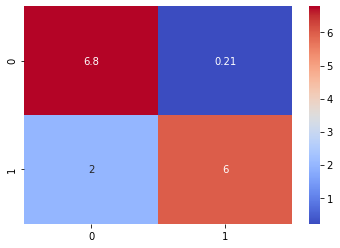

In [27]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [28]:
f_score_knn = f1_score(y_test2, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 1.0
Average F-Score is : 0.8659627008698217


# SVM(Support Vector Machine)

In [29]:
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.2456
Testing accuracy on selected features: 93.3333


In [30]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print(cm_svc)

[[7 0]
 [1 7]]


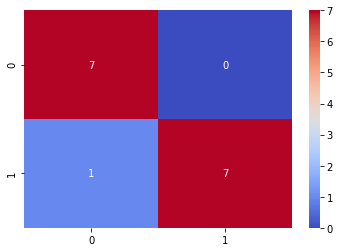

In [31]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [32]:
f_score_knn = f1_score(y_test2, y_test_prediction_svc)

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.9333333333333333


# Backward Feature Selection

In [33]:
backward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 400,
                                             forward= False,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:422: RuntimeWarning: Mean of emp

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 476 out of 476 | elapsed:    9.0s finished

[2020-10-20 14:13:42] Features: 475/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 468 out of 475 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 475 out of 475 | elapsed:    9.0s finished

[2020-10-20 14:13:51] Features: 474/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 474 out of 474 | elapsed:    9.6s finished

[2020-10-20 14:14:01] Features: 473/400 -- score: nan[Parallel(n_jobs=-1)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 453 out of 453 | elapsed:   26.4s finished

[2020-10-20 14:18:47] Features: 452/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 452 out of 452 | elapsed:   14.2s finished

[2020-10-20 14:19:02] Features: 451/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 444 out of 451 | elapsed:   13.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 451 out of 451 | elapsed:   13.6s finished

[2020-10-20

[Parallel(n_jobs=-1)]: Done 431 out of 431 | elapsed:   31.9s finished

[2020-10-20 14:25:42] Features: 430/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 430 out of 430 | elapsed:   16.8s finished

[2020-10-20 14:25:59] Features: 429/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 422 out of 429 | elapsed:   16.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 429 out of 429 | elapsed:   16.9s finished

[2020-10-20 14:26:16] Features: 428/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Paral

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 408 out of 408 | elapsed:   19.5s finished

[2020-10-20 14:35:01] Features: 407/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:   20.3s finished

[2020-10-20 14:35:22] Features: 406/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:   21.6s finished

[2020-10-20 14:35:43] Features: 405/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Do

In [34]:
print('Time taken by Backward Feature Selection is :'+str(int(time.time() - backward_start_time))+' seconds')

Time taken by Backward Feature Selection is :1583 seconds


In [35]:
feature_selector.k_feature_names_

('U46571_at',
 'M82882_at',
 'HG2917-HT3061_f_at',
 'Z23115_at',
 'U77827_at',
 'Z48051_rna1_at',
 'L13800_at',
 'X06745_at',
 'U56833_at',
 'S38953_s_at',
 'U72066_at',
 'L00634_s_at',
 'L00058_at',
 'X67951_at',
 'S79873_s_at',
 'U41060_at',
 'U52077_s_at',
 'X74328_rna1_at',
 'Z81326_at',
 'Z49194_at',
 'X17644_s_at',
 'U66497_at',
 'X78669_at',
 'HG1728-HT1734_s_at',
 'L09717_at',
 'D25278_at',
 'X93511_s_at',
 'D88613_at',
 'L05148_at',
 'M58285_at',
 'X63717_at',
 'U75276_s_at',
 'U77718_at',
 'X17025_at',
 'L43579_s_at',
 'M34353_s_at',
 'J05682_at',
 'M55210_at',
 'L08895_at',
 'M26602_at',
 'U52513_at',
 'X80199_at',
 'U18937_at',
 'M31932_at',
 'X90846_at',
 'X16665_at',
 'U44378_at',
 'U21090_at',
 'X66533_at',
 'Z37976_at',
 'X74614_at',
 'M77349_at',
 'U72936_s_at',
 'M81181_s_at',
 'U10117_at',
 'X92098_at',
 'L29376_at',
 'X58528_s_at',
 'M54992_at',
 'Z19002_at',
 'M96859_at',
 'M97935_s_at',
 'L47738_at',
 'S72503_s_at',
 'D26068_at',
 'U57629_at',
 'U40282_at',
 'L280

In [36]:
feature_columns = list(feature_selector.k_feature_idx_)
print(feature_columns)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [37]:
X_train3=X_train.iloc[:, feature_columns]
X_train3.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,D00003_s_at,Y10936_at,S81003_at,U04636_rna1_at,U17163_at,L40027_at,D85527_at,Z49254_at,X95586_at,S63912_at
55,-0.401784,-1.239457,-0.629075,-1.038184,-1.044255,-1.236516,-0.370947,0.063411,-0.390991,-0.149813,...,0.498442,-0.125493,-1.204365,-0.333853,-0.924979,-0.371041,-0.803514,0.718696,0.212594,-1.279207
70,0.280101,-0.816502,-0.193300,0.243864,1.873594,3.286452,1.562391,-0.234809,-0.689242,1.734031,...,-0.248712,1.331441,-0.954640,0.850920,2.004721,1.761239,3.259649,0.645994,0.813509,-1.541062
62,1.215108,-0.139255,-0.764548,-0.579470,-0.787427,-1.522554,-0.153007,0.226723,0.382029,-0.058659,...,-0.766348,-0.488163,-0.357676,-0.534814,0.207670,1.017490,-0.108381,0.316560,0.879868,0.483640
43,-0.623913,-0.585564,-0.663326,0.349721,2.216031,1.373576,-0.188159,-0.014694,-0.488379,1.293455,...,0.268924,2.181840,0.044264,-0.336852,0.758175,0.207763,1.645147,0.532396,-0.591084,0.343360
4,1.514724,1.557755,-0.733050,-0.539479,-0.223833,-0.539300,0.458631,0.688255,0.430724,-1.334812,...,0.234740,-0.475657,1.147814,-0.186881,0.365861,-0.020160,-0.251892,1.859219,3.283529,1.250502


In [38]:
X_test3=X_test.iloc[:, feature_columns]
X_test3.head()

,U46571_at,M82882_at,HG2917-HT3061_f_at,Z23115_at,U77827_at,Z48051_rna1_at,L13800_at,X06745_at,U56833_at,S38953_s_at,...,D00003_s_at,Y10936_at,S81003_at,U04636_rna1_at,U17163_at,L40027_at,D85527_at,Z49254_at,X95586_at,S63912_at
26,-0.908031,-0.328677,-1.108581,-0.605346,0.239884,-0.503545,0.191479,-1.271482,-0.549247,0.814898,...,0.356824,1.725376,-1.111610,0.071070,1.245404,-2.344376,0.236943,-0.762621,0.304759,0.455584
27,0.140624,0.556156,-0.111955,-0.198384,0.097202,0.658482,0.086024,0.240924,-0.686199,-0.408082,...,-0.746815,-0.163011,-0.098437,-0.426835,0.688571,-0.092136,1.277400,-0.394563,0.260520,-0.736793
48,-0.298468,-1.029277,0.322291,-0.403041,-1.878945,-1.522554,-0.546705,0.354532,0.272468,-0.020678,...,0.508208,-0.938374,-0.526538,-0.369846,0.188687,-1.105793,-1.166776,-0.380932,-1.391076,-0.367390
22,-0.262307,-0.621891,-1.433043,0.236806,-0.730354,0.765746,0.381297,0.120215,-0.034914,0.549033,...,-0.497764,0.706147,-0.319623,-0.420836,0.555690,-0.353048,-0.085957,-0.290053,-1.236239,0.399472
30,0.915493,0.234398,1.341241,1.923464,1.466950,-0.825337,-0.307674,-0.277412,0.196383,-0.856255,...,0.356824,-0.356851,0.194099,0.817926,-0.159334,0.504663,-0.328133,-1.212469,-0.616891,-0.488965


In [39]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test3 = np.array([a+1 for a in y_test])

print(y_test2)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [40]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.2281
Testing accuracy on selected features for 2 neighbors: 86.6667
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 92.9825
Testing accuracy on selected features for 3 neighbors: 80.0000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 89.4737
Testing accuracy on selected features for 4 neighbors: 80.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 87.7193
Testing accuracy on selected features for 6 neighbors: 93.3333
KNN Classfier for 7 neighbors:
Training accuracy on

In [41]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [1 7]]
Average Confusion matrix is : [[6.78947368 0.21052632]
 [2.68421053 5.31578947]]


Confusion Matrix of KNN Classifier:


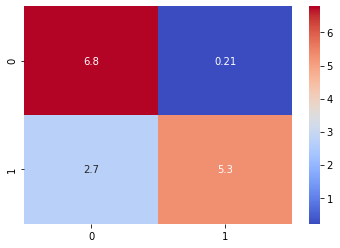

In [42]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [43]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9333333333333333
Average F-Score is : 0.8301672654287939


# SVM(Support Vector Machine)

In [44]:
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.2456
Testing accuracy on selected features: 86.6667


In [45]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print(cm_svc)

[[7 0]
 [2 6]]


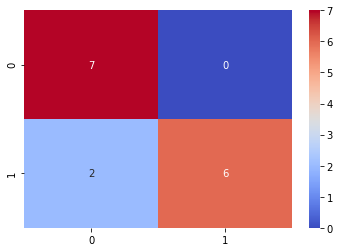

In [46]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [47]:
f_score_knn = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.8750000000000001
